<a href="https://colab.research.google.com/github/micadecoud/Desarrollo-web-mica/blob/main/Obligatorio_deepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Data Profiling
#!pip install ydata_profiling
from ydata_profiling import ProfileReport


##Palette
from matplotlib import colors
palette = ["#FAC8BE", "#80E1C6", "#FFB3E1", "#6CC3FC", "#FFD168", "#C894E1"]
sns.set(rc={"axes.facecolor":"#e6e6e6","figure.facecolor":"#f5f5f5"})
cmap = colors.ListedColormap( ["#FAC8BE", "#80E1C6", "#FFB3E1", "#6CC3FC", "#FFD168", "#C894E1"])


In [57]:
crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


DATASET LANDING PAGE

1) DR_NO
Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits

2) Date Rptd
MM/DD/YYYY

3) DATE OCC
MM/DD/YYYY

4) TIME OCC
In 24 hour military time.

5) AREA
The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.

6) AREA NAME
The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.

7) Rpt Dist No
A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4


8) Part 1-2


9) Crm Cd
Indicates the crime committed. (Same as Crime Code 1)

10) Crm Cd Desc
Defines the Crime Code provided.

11) Mocodes
Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order. https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf

12) Vict Age
Two character numeric

13)Vict Sex
F - Female M - Male X - Unknown

14) Vict Descent
Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

15) Premis Cd
The type of structure, vehicle, or location where the crime took place.

16) Premis Desc
Defines the Premise Code provided.

17) Weapon Used Cd
The type of weapon used in the crime.

18) Weapon Desc
Defines the Weapon Used Code provided.

19) Status
Status of the case. (IC is the default)

20) Status Desc
Defines the Status Code provided.

21) Crm Cd 1
Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.

22)Crm Cd 2
May contain a code for an additional crime, less serious than Crime Code 1.

23) Crm Cd 3
May contain a code for an additional crime, less serious than Crime Code 1.

24) Crm Cd 4
May contain a code for an additional crime, less serious than Crime Code 1.

25) LOCATION
Street address of crime incident rounded to the nearest hundred block to maintain anonymity.

26) Cross Street
Cross Street of rounded Address

27) LAT
Latitude

28) LON
Longtitude



In [14]:

crime.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.826380e+05,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982624.000000,326167.000000,982627.000000,68875.000000,2311.000000,64.00000,982638.000000,982638.000000
mean,2.197437e+08,1338.945426,10.700277,1116.459887,1.404253,500.823555,29.079817,306.133008,363.840882,500.578668,958.167085,984.204673,991.21875,33.995725,-118.082225
std,1.294954e+07,651.537830,6.107808,610.893787,0.490747,206.211940,21.970094,219.053795,123.684663,206.010361,110.232109,51.485644,27.06985,1.636729,5.672940
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.106089e+08,900.000000,5.000000,587.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430500
50%,2.208146e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.309153e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499253e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           982638 non-null  int64  
 1   Date Rptd       982638 non-null  object 
 2   DATE OCC        982638 non-null  object 
 3   TIME OCC        982638 non-null  int64  
 4   AREA            982638 non-null  int64  
 5   AREA NAME       982638 non-null  object 
 6   Rpt Dist No     982638 non-null  int64  
 7   Part 1-2        982638 non-null  int64  
 8   Crm Cd          982638 non-null  int64  
 9   Crm Cd Desc     982638 non-null  object 
 10  Mocodes         837376 non-null  object 
 11  Vict Age        982638 non-null  int64  
 12  Vict Sex        844193 non-null  object 
 13  Vict Descent    844182 non-null  object 
 14  Premis Cd       982624 non-null  float64
 15  Premis Desc     982053 non-null  object 
 16  Weapon Used Cd  326167 non-null  float64
 17  Weapon Des

In [15]:
# Chequeamos los valores nulos
crime.isnull().sum()

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


###Análisis Exploratorio de Datos (EDA)

##**Data profiling**

In [8]:
profile = ProfileReport(crime, title="Profiling Report")


profile.to_file("crime_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##Manejo de datos faltantes

-Vic Sex: categoria H y - pasarlas a X (Uknown)


In [59]:
##Notamos que estos valores nulos representan que no tiene registro de otros crímenes adicionales. Por este motivo decidimos imputar los valores Nan como 0.

crime['Crm Cd 4'].head()





,Crm Cd 4
0,0
1,0
2,0
3,0
4,0


In [58]:
crime[['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']] = crime[['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']].fillna(0)
#Cambiamos el tipo de dato a int ya que los transforma como un float.
crime[['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']] = crime[['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']].astype(int)

## Transformación del Dataset

* **Vict Sex**: Existe una categoría que no se encuentra en el diccionario ('H'), que según bibliogrfía representa sexo no definido, por lo tanto decidimos no imputarla a otra categoría. Los valores nulos o '-' decidimos imputarlos a la categoría ´'X' (Uknown).

In [60]:
## Vict Sex
sexo = crime['Vict Sex'].unique()
print(sexo)
#M:Male
#F:Female
#X:Unknown


['M' 'X' 'F' nan 'H' '-']


In [61]:
#Filtramos el dataset por los valores con sexo '-'

filtro_faltantes = crime[crime['Vict Sex']=='-']

pd.set_option('display.max_columns', None)

filtro_faltantes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
807416,232012240,06/29/2023 12:00:00 AM,06/29/2023 12:00:00 AM,2115,20,Olympic,2091,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329 1822 2002 0601 1309,0,-,-,408.0,AUTO SUPPLY STORE*,NaN,NaN,IC,Invest Cont,740.0,0,0,0,1900 S WESTERN AV,NaN,34.0385,-118.3135


In [66]:
#Filtramos el dataset por los valores con sexo 'H'
#Observamos que en aquellos casos donde la víctima se identifica con sexo 'H', los valores de la edad y la descendencia son conocidos.


filtro_faltantes1 = crime[crime['Vict Sex']=='H']

pd.set_option('display.max_columns', None)

filtro_faltantes1.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
17618,200714556,10/05/2020 12:00:00 AM,10/05/2020 12:00:00 AM,200,7,Wilshire,769,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0913 0906 0416 1218 1805,35,H,H,101.0,STREET,312.0,PIPE/METAL PIPE,IC,Invest Cont,230.0,0,0,0,15TH ST,2ND AV,34.0454,-118.3189
21739,200708374,04/14/2020 12:00:00 AM,04/14/2020 12:00:00 AM,1300,7,Wilshire,721,1,330,BURGLARY FROM VEHICLE,0344,33,H,F,101.0,STREET,NaN,NaN,IC,Invest Cont,330.0,0,0,0,8500 COLGATE AV,NaN,34.0709,-118.3764
30525,202017825,11/29/2020 12:00:00 AM,11/29/2020 12:00:00 AM,1530,20,Olympic,2088,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,0913 2000 1243 0416 0305,25,H,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,0,0,0,1600 ARAPAHOE ST,NaN,34.0418,-118.2852
38069,200204197,01/03/2020 12:00:00 AM,01/03/2020 12:00:00 AM,2200,2,Rampart,237,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,25,H,F,103.0,ALLEY,NaN,NaN,IC,Invest Cont,740.0,0,0,0,1600 W 2ND ST,NaN,34.0613,-118.2638
57066,201310830,05/13/2020 12:00:00 AM,05/09/2020 12:00:00 AM,1716,13,Newton,1322,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,49,H,F,145.0,MAIL BOX,NaN,NaN,IC,Invest Cont,440.0,0,0,0,2300 WALL ST,NaN,34.0254,-118.2629


In [71]:
#Filtramos el dataset por los valores con sexo 'X'

filtro_faltantes2 = crime[crime['Vict Sex']=='X']

pd.set_option('display.max_columns', None)

filtro_faltantes2.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,0,0,0,1400 W 37TH ST,NaN,34.0210,-118.3002
13,221008844,05/06/2022 12:00:00 AM,11/01/2020 12:00:00 AM,130,10,West Valley,1029,1,510,VEHICLE - STOLEN,NaN,0,X,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,0,0,0,VALJEAN ST,VANOWEN AV,34.1939,-118.4859
23,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,X,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,0,0,0,200 E AVENUE 28,NaN,34.0820,-118.2130
26,222106031,02/23/2022 12:00:00 AM,08/14/2020 12:00:00 AM,1300,21,Topanga,2113,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",NaN,0,X,NaN,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,668.0,0,0,0,7700 SAUSALITO AV,NaN,34.2105,-118.6157
27,200209713,05/03/2020 12:00:00 AM,05/02/2020 12:00:00 AM,1800,2,Rampart,245,1,510,VEHICLE - STOLEN,NaN,0,X,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,0,0,0,2500 W 4TH ST,NaN,34.0642,-118.2771


<ipython-input-78-9e05218608a4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="Greens_d")


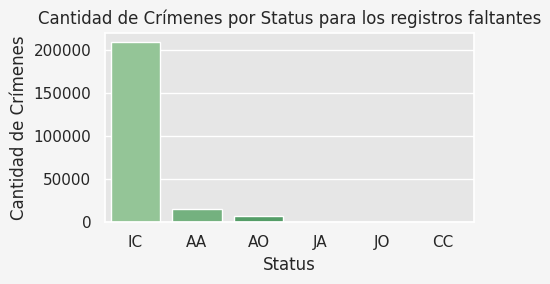

In [78]:
#Gráfico del status del crimen para las víctimas que se desconocen datos de sexo, edad y descendencia.

status_counts = filtro_faltantes2['Status'].value_counts()

# Crear el barplot
plt.figure(figsize=(5,3))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="Greens_d")

# Añadir título y etiquetas
plt.title('Cantidad de Crímenes por Status para los registros faltantes')
plt.xlabel('Status')
plt.ylabel('Cantidad de Crímenes')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

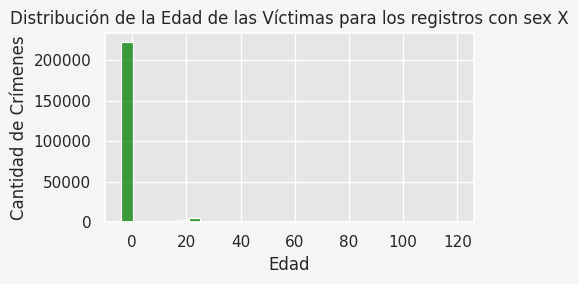

In [79]:
plt.figure(figsize=(5,3))
sns.histplot(filtro_faltantes2['Vict Age'], bins=30, kde=False, color='green')

# Añadir título y etiquetas
plt.title('Distribución de la Edad de las Víctimas para los registros con sex X')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Crímenes')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

#La mayor cantidad de casos de víctimas con sexo X (desconocido) figuran con edad 0, por lo que entendemos que también se desconoce ese dato.

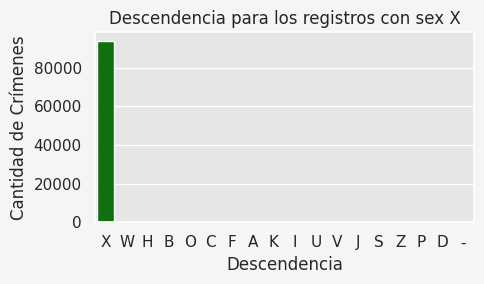

In [83]:
counts = filtro_faltantes2['Vict Descent'].value_counts()

# Crear el barplot
plt.figure(figsize=(5,3))
sns.barplot(x=counts.index, y=counts.values, color="green")

# Añadir título y etiquetas
plt.title('Descendencia para los registros con sex X')
plt.xlabel('Descendencia')
plt.ylabel('Cantidad de Crímenes')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


#Se observa que para las víctimas con sexo 'X' (desconocido), la descendencia también figura como desconocida.

In [68]:
## Transformacion de columna Vict Sex

crime['Vict Sex'] = crime['Vict Sex'].replace('-', 'X')
crime['Vict Sex'] = crime['Vict Sex'].replace(np.nan, 'X')

* Weapon Used
* Weapon Desc

## Manejo de Outliers

## Conversión del tipo de datos

- Transformar tipo de datos de todas las columnas
- Datetime en las graficas




## Visualizaciones

<ipython-input-70-45a0cc1e836f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette="Blues_d")


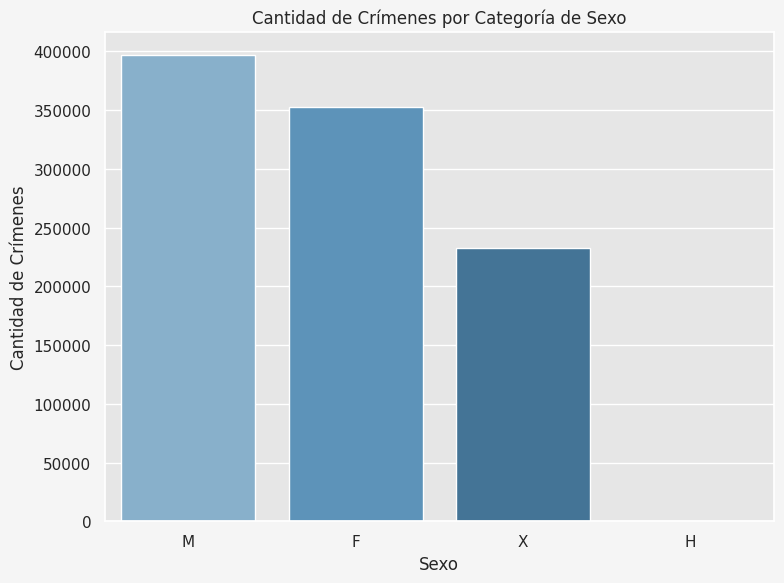

In [70]:
sex_counts = crime['Vict Sex'].value_counts()

# Crear el barplot
plt.figure(figsize=(8,6))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette="Blues_d")

# Añadir título y etiquetas
plt.title('Cantidad de Crímenes por Categoría de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Crímenes')

# Mostrar la gráfica
plt.tight_layout()
plt.show()



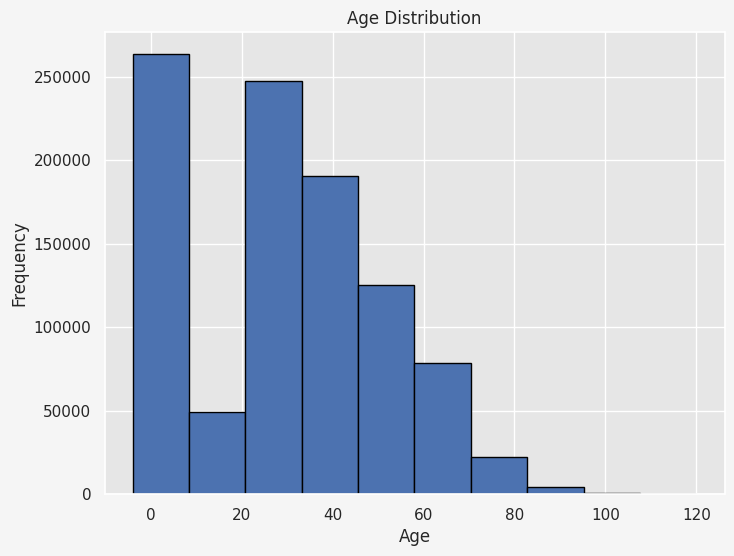

In [13]:
## Edad

plt.figure(figsize=(8, 6))
plt.hist(crime[Vict Age'], bins=10, edgecolor='black')

# Add labels and title
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

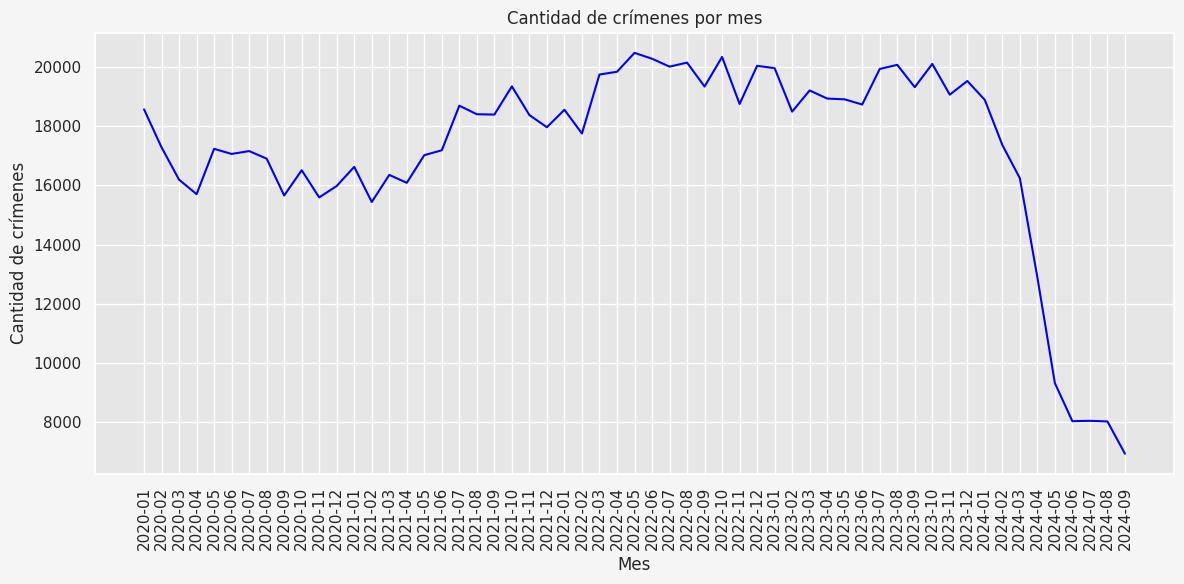

In [35]:
monthly_counts = crime['DATE OCC'].dt.to_period('M').value_counts().sort_index()

# Graficar la cantidad de crímenes por mes
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, color = 'blue')
plt.title('Cantidad de crímenes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de crímenes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

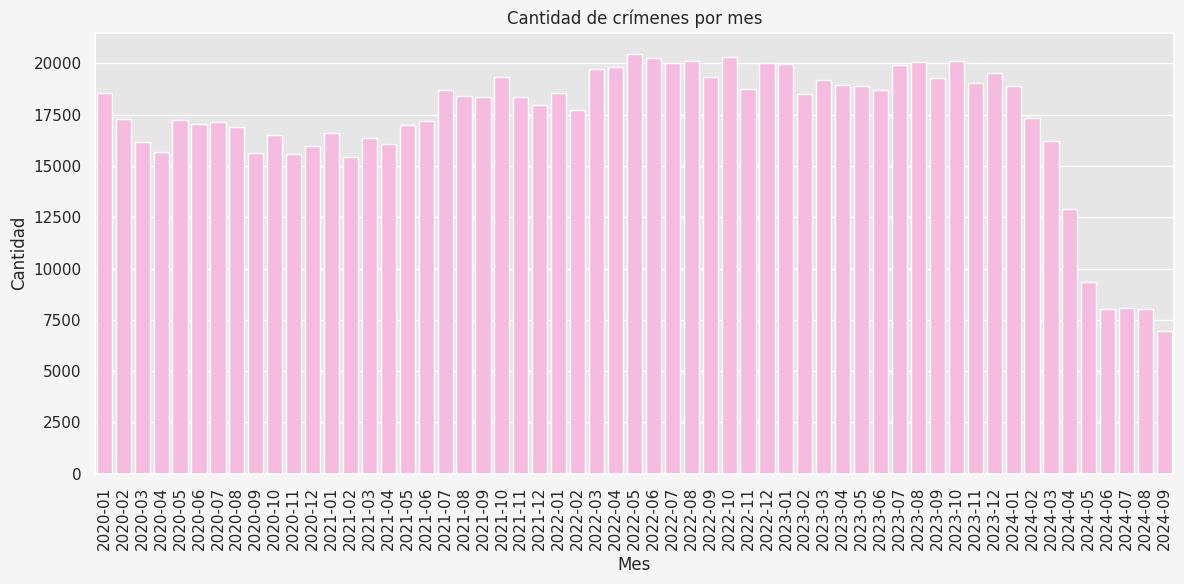

In [38]:
monthly_counts = crime['DATE OCC'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_counts.index.astype(str), y=monthly_counts.values,color=palette[2])
plt.title('Cantidad de crímenes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

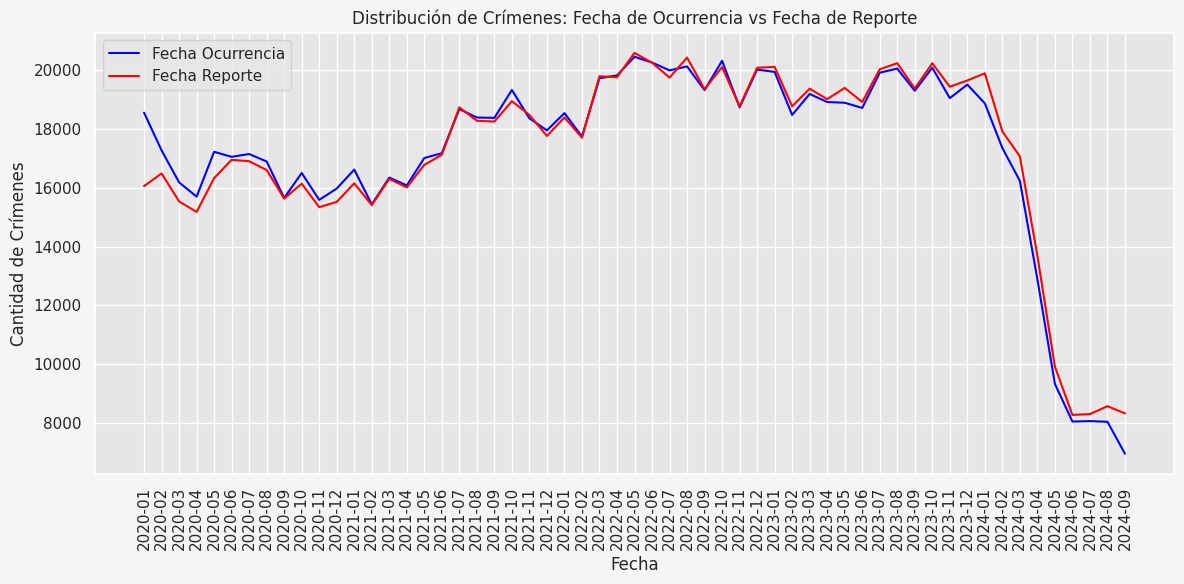

In [43]:
# Cambiamos a formato datetime
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'])
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'])


# Calcular los conteos diarios para ambas fechas
monthly_occ_counts = crime['DATE OCC'].dt.to_period('M').value_counts().sort_index()
monthly_rep_counts = crime['Date Rptd'].dt.to_period('M').value_counts().sort_index()

# Crear la figura
plt.figure(figsize=(12,6))

# Graficar la distribución de DATE OCC (fecha de ocurrencia)
sns.lineplot(x=monthly_occ_counts.index.astype(str), y=monthly_occ_counts.values, label='Fecha Ocurrencia', color='blue')

# Graficar la distribución de DATE REP (fecha de reporte)
sns.lineplot(x=monthly_rep_counts.index.astype(str), y=monthly_rep_counts.values, label='Fecha Reporte', color='red')

# Añadir título y etiquetas
plt.title('Distribución de Crímenes: Fecha de Ocurrencia vs Fecha de Reporte')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Crímenes')
plt.xticks(rotation=90)
plt.legend()

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [44]:

# Calcular la diferencia entre las fechas de reporte y ocurrencia
crime['diferencia_dias'] = (crime['Date Rptd'] - crime['DATE OCC']).dt.days

# Calcular el promedio de la diferencia en días
promedio_diferencia = crime['diferencia_dias'].mean()

print(f'El promedio de la diferencia entre la fecha de ocurrencia y la fecha de reporte es de {promedio_diferencia:.2f} días.')



El promedio de la diferencia entre la fecha de ocurrencia y la fecha de reporte es de 11.86 días.
